In [ ]:
# General Notes

# some bad coding practice can be seen occasionally (sorry)
    # main one is how I started something at 1 instead of 0, which I had to account for by doing -1 later
    # "" and '' not being utilized in a consistent manner (interchangeably)
    # names and stuff might occasionally belikethis instead of done_like_this at times, sorry
    # certain variable names are reused; take care to run the code in logical order

# other than that
    # heavily commented to allow others to better understand and utilize the code if necessary
    # some unused code (most likely no longer useful) may be present, usually commented out
    # things surrounded by """  """ can be ran, it was just commented out for things to look nice

In [1]:
# all of the setup from the intro.ipynb + more
# remember to run this cell every time you start a new session

from snowshovel.io import read_single_alert, parse_alerts
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set this to the directory containing the unzipped avro alerts
data_dir = Path("C:/Users/natha/Downloads/avro_single/avro_single/")

# once new sets are saved to the directory, you can skip the next ~12 cells that led to the creation of the new sets 

In [2]:
# this takes the longest actually
pd.set_option('display.max_columns', None)
# Set the number of alerts to read (total number is 71708 for ztf data); it's fine if it is over the actual amount 
n_to_read = 71708
alerts_df = parse_alerts(data_dir=data_dir, n_to_read=n_to_read)

#(to print it if needed)
alerts_df

  0%|▎                                                                            | 279/71708 [00:01<06:41, 177.72it/s]


,jd,diffmaglim,fid,programpi,programid,candid,isdiffpos,field,ndethist,xpos,ypos,ra,dec,magpsf,sigmapsf,chipsf,magap,sigmagap,distnr,magnr,sigmagnr,chinr,sharpnr,sky,magdiff,fwhm,classtar,mindtoedge,magfromlim,seeratio,aimage,bimage,aimagerat,bimagerat,elong,nneg,nbad,rb,rbversion,ssdistnr,ssmagnr,ssnamenr,sumrat,magapbig,sigmagapbig,psra1,psdec1,jdstarthist,jdendhist,scorr,tooflag,psobjectid1,sgmag1,srmag1,simag1,szmag1,tmjmag1,tmhmag1,tmkmag1,tmobjectid1,sgscore1,distpsnr1,psobjectid2,sgmag2,srmag2,simag2,szmag2,sgscore2,distpsnr2,tmjmag2,tmhmag2,tmkmag2,tmobjectid2,psobjectid3,sgmag3,srmag3,simag3,szmag3,sgscore3,distpsnr3,tmjmag3,tmhmag3,tmkmag3,tmobjectid3,nmtchps,nmtchtm,dsnrms,ssnrms,dsdiff,magzpsci,magzpsciunc,magzpscirms,clrcoeff,clrcounc,zpclrcov,zpmed,clrmed,clrrms,neargaia,neargaiabright,maggaia,maggaiabright,exptime,objectId
0,2.460137e+06,17.102144,2,Stein,1,2460136710000,1.0,3944,1,1003.802002,124.533836,210.805218,53.652500,15.977883,0.077846,4.110220,13.406020,0.095406,None,None,None,None,None,None,None,6.541683,None,None,None,None,2.429860,0.494316,0.371443,0.075564,4.915605,None,None,None,None,None,None,None,None,10.464948,0.027930,210.811369,53.646804,None,None,14.349497,0,1.723721e+17,-99.000000,21.548700,20.170900,19.435200,-99.000,-99.000,-99.000,-99.0,None,None,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,None,None,-99.000000,-99.000000,-99.000,-99.0,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,None,None,-99.000,-99.000,-99.000,-99.0,1,0,None,None,None,24.055664,0.137861,None,None,None,None,None,None,None,None,None,None,None,720.0,WNTR23aaadx
1,2.460137e+06,17.102144,2,Stein,1,2460136710001,1.0,3944,1,762.754822,1064.167236,210.931257,53.943731,14.912401,0.030799,69.671799,10.850365,0.009289,None,None,None,None,None,None,None,71.452667,None,None,None,None,12.892039,10.988384,0.180428,0.153785,1.173242,None,None,None,None,None,None,None,None,7.169273,0.001384,210.939941,53.940021,None,None,37.418120,0,1.727221e+17,-99.000000,21.170200,21.732599,20.891199,-99.000,-99.000,-99.000,-99.0,None,None,1.727321e+17,21.730499,21.020500,21.123100,20.578300,None,None,-99.000000,-99.000000,-99.000,-99.0,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,None,None,-99.000,-99.000,-99.000,-99.0,2,0,None,None,None,24.055664,0.137861,None,None,None,None,None,None,None,None,None,None,None,720.0,WNTR23aaady
2,2.460137e+06,17.102144,2,Stein,1,2460136710002,1.0,3944,1,385.960724,1107.937012,211.129694,53.957127,14.731148,0.026267,140.525467,11.797956,0.022846,None,None,None,None,None,None,None,134.926590,None,None,None,None,37.337414,13.528161,0.276724,0.100263,2.759977,None,None,None,None,None,None,None,None,7.063928,0.001274,211.135580,53.953946,None,None,35.829303,0,1.727421e+17,-99.000000,-99.000000,21.689100,21.262501,-99.000,-99.000,-99.000,-99.0,None,None,1.727421e+17,-99.000000,-99.000000,21.878401,20.704100,None,None,-99.000000,-99.000000,-99.000,-99.0,1.727421e+17,-99.000000,-99.000000,21.607000,21.000500,None,None,-99.000,-99.000,-99.000,-99.0,3,0,None,None,None,24.055664,0.137861,None,None,None,None,None,None,None,None,None,None,None,720.0,WNTR23aaadz
3,2.460137e+06,17.102144,2,Stein,1,2460136710003,1.0,3944,1,418.946777,1110.763184,211.112326,53.958031,14.476304,0.021256,251.178055,11.798103,0.023360,None,None,None,None,None,None,None,112.832878,None,None,None,None,20.186941,17.498220,0.178910,0.155081,1.153657,None,None,None,None,None,None,None,None,7.005735,0.001234,211.122532,53.953334,None,None,49.482251,0,1.727421e+17,-99.000000,-99.000000,21.607000,21.000500,-99.000,-99.000,-99.000,-99.0,None,None,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,None,None,-99.000000,-99.000000,-99.000,-99.0,-9.900000e+01,-99.000000,-99.000000,-99.000000,-99.000000,None,None,-99.000,-99.000,-99.000,-99.0,1,0,None,None,None,24.055664,0.137861,None,None,None,None,None,None,None,None,None,None,None,720.0,WNTR23aaaea
4,2.460137e+06,17.102144,2,Stein,1,2460136710004,1.0,3944,1,808.882385

In [3]:
# adjusted for useful information
useful_columns = [
    #"isdiffpos", # Is the detection postive (more flux in science image than reference), or negative (less flux)?
    "ra", # What is the sky position in Right Ascension?
    "dec", # What is the sky position in Declination?
    "objectId", # the object ID
    "candid", # candidate ID (?)
    #"magpsf", # What is the magnitude (brightness) of the detection?
    #"sigmapsf", # What is the uncertainty on the magnitude?
    #"distnr", # How close is the detection to a known source in the reference image?
    "ndethist", # How many times has this object been detected?
]

slim_alerts_df = alerts_df[useful_columns]

# Bad subtractions are often not repeated
# Let's restrict ourselves to sources which are detected at least twice

#commented out for WINTER data, since ndethist for all is 1
#mask = slim_alerts_df["ndethist"] > 1
#slim_alerts_df = slim_alerts_df[mask].reset_index()
#print(f"There are {len(slim_alerts_df)} alerts passing our cut")
slim_alerts_df
slim_WINTER = slim_alerts_df
slim_WINTER
#roundabout way to do this but yeah

#note that the "slim" part doesn't make sense in this case
#it would be fine in the future perhaps when WINTER observes something multiple times

,ra,dec,objectId,candid,ndethist
0,210.805218,53.652500,WNTR23aaadx,2460136710000,1
1,210.931257,53.943731,WNTR23aaady,2460136710001,1
2,211.129694,53.957127,WNTR23aaadz,2460136710002,1
3,211.112326,53.958031,WNTR23aaaea,2460136710003,1
4,210.906965,53.956073,WNTR23aaaeb,2460136710004,1
...,...,...,...,...,...
274,322.665703,44.708114,WNTR23aaads,2460136940096,1
275,322.675106,44.713096,WNTR23aaadt,2460136940097,1
276,322.675317,44.708866,WNTR23aaadu,2460136940098,1
277,322.672319,44.707470,WNTR23aaadv,2460136940099,1


In [4]:
# saving results to read the same data quicker if necessary
# adjust when doing different sets
name = "slim_WINTER.csv"
slim_WINTER.to_csv(name, index=False)

In [5]:
# if necessary, run this code to not have to wait 1 hour to read the whole ztf set to get to the slim_alerts_df
slim_alerts_df = pd.read_csv('slim_alerts_df.csv')
slim_alerts_df

,index,ra,dec,objectId,candid,ndethist
0,0,230.914883,-19.238593,ZTF18adbairy,2350249170015010010,620
1,1,230.630090,-19.273569,ZTF18adbairx,2350249170015010011,639
2,2,231.014147,-19.282204,ZTF18adbinmg,2350249170015010013,611
3,3,230.909926,-19.485533,ZTF18adbaidy,2350249170015010023,721
4,4,230.435069,-19.499763,ZTF21aalkhuz,2350249170015010024,65
...,...,...,...,...,...,...
42173,71700,305.732106,35.636097,ZTF18aazmjpp,2350383655915015023,898
42174,71701,305.732159,35.636089,ZTF18aazmjpp,2350383655915015024,895
42175,71702,305.818751,35.670357,ZTF18aawcdaq,2350383655915015026,1336
42176,71705,305.899257,35.572941,ZTF18aaxpmln,2350383655915015032,942


In [6]:
# reading the variable star catalogue data
# skiprows because of how the data is given, of which rows 0 through 8 are not data
# total is 432237; utilize the code: ", (10001, 432237)" after "(0,8)" for limiting range to 10000 if needed for testing
skip_ranges = [(0, 8)]
skip_rows = [i for start, end in skip_ranges for i in range(start, end)]
variable_star = pd.read_csv('results6_22_18_27_3827.csv', skiprows=skip_rows)
variable_star

,# vivaID,ra,dec,aVar,bestPeriod
0,515403326727,270.435061,-19.517229,0.134340,0.392522
1,515403270290,270.360613,-19.598067,0.589290,0.036687
2,515403212626,270.689381,-19.906978,0.474643,0.819796
3,515403187805,270.814998,-20.029753,0.551396,0.037601
4,515403141120,270.273648,-19.841971,0.302840,0.844155
...,...,...,...,...,...
432231,515937080067,193.942027,-64.641244,0.364866,0.424314
432232,515937099278,193.993230,-64.277040,0.290540,0.384007
432233,515937113364,194.030364,-64.330271,0.301547,0.035598
432234,515937123034,194.081488,-64.449581,0.427632,8.322914


In [7]:
# define the columns of the original dataframe (slim_alerts_df) to be used in the shortened ones
# has to be the same as the original or it doesn't work if I remember correctly
columns = ["ra", "dec", "objectId", "candid", "ndethist"]

# define the new bins for the "dec" column

# the bin_num, range of 1, and -1 in the code works but is bad coding practice; adjust later maybe
bin_num = 37
dec_bins = np.linspace(-90., 90., bin_num)  # 36 bins (1 less than bin_num); each bin with range of 5 degrees from -90 to 90

# create a dictionary to store the dataframes for each set, columns in dataframe based on what was defined earlier
slim_sets = {f'slim_set{i}': pd.DataFrame(columns=columns) for i in range(1, bin_num)}

# total number of rows in slim_alerts_df for tqdm
total_rows = len(slim_alerts_df)

# iterate over each row in "slim_alerts_df"
for _, row in tqdm(slim_alerts_df.iterrows(), total=total_rows, desc='making new dataframes for slim_alerts_df'):
    # get the value of the "dec" column on the corresponding row
    dec_value = row["dec"]
    
    # find the bin index where the dec_value falls into
    bin_index = np.digitize(dec_value, dec_bins) - 1
    
    # add the row to the respective set dataframe
    slim_sets[f'slim_set{bin_index}'].loc[len(slim_sets[f'slim_set{bin_index}'])] = row

# the "slim_sets" dictionary will contain the filtered dataframes for each set. 

# printing to see (commented out so it'll look better on github)
"""
for set_name, set_df in slim_sets.items():
    print(f"Set Name: {set_name}")
    print(set_df)
    print()
"""
#11 to 35 has data

making new dataframes for slim_alerts_df: 100%|█████████████████████████████████| 42178/42178 [01:32<00:00, 457.54it/s]


'\nfor set_name, set_df in slim_sets.items():\n    print(f"Set Name: {set_name}")\n    print(set_df)\n    print()\n'

In [8]:
# same thing but for slim_WINTER
columns = ["ra", "dec", "objectId", "candid", "ndethist"]
bin_num = 37
dec_bins = np.linspace(-90., 90., bin_num)  # 36 bins (1 less than bin_num); each bin with range of 5 degrees
slim_WINTER_sets = {f'slim_WINTER_set{i}': pd.DataFrame(columns=columns) for i in range(1, bin_num)}

total_rows = len(slim_WINTER)

for _, row in tqdm(slim_WINTER.iterrows(), total=total_rows, desc='making new dataframes for slim_WINTER'):
    dec_value = row["dec"]
    bin_index = np.digitize(dec_value, dec_bins) - 1
    slim_WINTER_sets[f'slim_WINTER_set{bin_index}'].loc[len(slim_WINTER_sets[f'slim_WINTER_set{bin_index}'])] = row

# (commented out so it'll look better on github)
"""
for set_name, set_df in slim_WINTER_sets.items():
    print(f"Set Name: {set_name}")
    print(set_df)
    print()
"""
#24, 26, 28 has data

making new dataframes for slim_WINTER: 100%|████████████████████████████████████████| 279/279 [00:00<00:00, 453.28it/s]


'\nfor set_name, set_df in slim_WINTER_sets.items():\n    print(f"Set Name: {set_name}")\n    print(set_df)\n    print()\n'

In [9]:
# same thing for the catalogue dataframe    
# define the columns of the original dataframe (variable_star) to be used in the shortened ones 
columns = ["# vivaID","ra","dec","aVar","bestPeriod"]
dec_bins = np.linspace(-90., 90., bin_num) 
var_star_sets = {f'var_star_set{i}': pd.DataFrame(columns=columns) for i in range(1, bin_num)}
total_rows = len(variable_star)

for _, row in tqdm(variable_star.iterrows(), total=total_rows, desc='Processing variable_star rows'):
    dec_value = row["dec"]
    bin_index = np.digitize(dec_value, dec_bins) - 1
    var_star_sets[f'var_star_set{bin_index}'].loc[len(var_star_sets[f'var_star_set{bin_index}'])] = row

# (commented out so it'll look better on github)
"""
for set_name, set_df in var_star_sets.items():
    print(f"Set Name: {set_name}")
    print(set_df)
    print()
"""
#4 to 14 has data

Processing variable_star rows: 100%|██████████████████████████████████████████| 432236/432236 [15:25<00:00, 467.11it/s]


'\nfor set_name, set_df in var_star_sets.items():\n    print(f"Set Name: {set_name}")\n    print(set_df)\n    print()\n'

In [9]:
# loop through each dictionary and save each new slim set as a CSV file in the directory for easy access
for set_name, slim_set in slim_sets.items():
    filename = f"{set_name}.csv"  # Name the CSV file based on the set_name
    slim_set.to_csv(filename, index=False)  # Save the DataFrame as CSV without the index column

In [ ]:
# do the same for the new variable star dictionary
for set_name, var_star_set in var_star_sets.items():
    filename = f"{set_name}.csv"  # Name the CSV file based on the set_name
    var_star_set.to_csv(filename, index=False)  # Save the DataFrame as CSV without the index column

In [41]:
# do the same for each new WINTER dictionary
for set_name, slim_WINTER_set in slim_WINTER_sets.items():
    filename = f"{set_name}.csv"  # Name the CSV file based on the set_name
    slim_WINTER_set.to_csv(filename, index=False)  # Save the DataFrame as CSV without the index column

In [51]:
# continue from here after the downloading of packages if there are sets saved in the directory

# read all of the new saved csv files, putting it back into dictionaries since that is what I used earlier 
# (so I don't have to adjust the later code)

slim_sets = {}
var_star_sets = {}
slim_WINTER_sets = {}
set_num = 1
total_set_num = 36
while set_num <= total_set_num:
    slim_filename = f"slim_set{set_num}.csv"
    slim_sets[f'slim_set{set_num}'] = pd.read_csv(slim_filename)
    
    var_filename = f"var_star_set{set_num}.csv"
    var_star_sets[f'var_star_set{set_num}'] = pd.read_csv(var_filename)

    WINTER_filename = f"slim_WINTER_set{set_num}.csv"
    slim_WINTER_sets[f'slim_WINTER_set{set_num}'] = pd.read_csv(WINTER_filename)
    
    set_num += 1

In [55]:
# loop through each slim_set, create a coordinate and put value into new "Coordinate" column (for comparisons later)
for set_name, slim_set in tqdm(slim_sets.items(), desc='Processing slim_sets'):
    # update the 'Coordinate' column for the current slim_set
    slim_set["Coordinate"] = SkyCoord(slim_set["ra"], slim_set["dec"], frame='icrs', unit='deg')

# do the same for var_star_set
for set_name, var_star_set in tqdm(var_star_sets.items(), desc='Processing var_star_sets'):
    # update the 'Coordinate' column for the current var_star_set
    var_star_set["Coordinate"] = SkyCoord(var_star_set["ra"], var_star_set["dec"], frame='icrs', unit='deg')
    
# do the same for slim_WINTER_set
for set_name, slim_WINTER_set in tqdm(slim_WINTER_sets.items(), desc='Processing slim_WINTER_sets'):
    # update the 'Coordinate' column for the current slim_WINTER_set
    slim_WINTER_set["Coordinate"] = SkyCoord(slim_WINTER_set["ra"], slim_WINTER_set["dec"], frame='icrs', unit='deg')    


Processing slim_WINTER_sets: 100%|████████████████████████████████████████████████████| 36/36 [00:00<00:00, 265.10it/s]


In [74]:
# create a list to store the results
results = []

# the set pair that is being compared
set_num = 13

# the stuff to easily change. note the first of each pair is plural (the dictionary) and the second is singular (the sets)
catalogue = var_star_sets
catalogue_set = "var_star_set"

comparison = slim_WINTER_sets
comparison_set = "slim_WINTER_set"
#n ote that in the code, "catalogue" and "cat" refer to the same thing; "comp" and "comparison" as well

# get the total number of iterations for tqdm to predict time
total_iterations = len(comparison[f'{comparison_set}{set_num}'])

# to mask parts of the data for efficiency. these denote the range you want to perform the cut/mask
# if these two lines cause issues, adjust 
cut_threshold = 10
# options are "degree", "arcmin", and "arcsec"
unit_type = "arcsec"

# current thresholds: set 14 (has to be in the degrees), set 13 (10 arcsec), set 12 (10 arcsec), set 11 (10 arcsec)

# use tqdm to track progress
# iterating through each data point in the 'coordinate' column for slim_set{set_num}
for comp_index, comp_row in tqdm(comparison[f'{comparison_set}{set_num}'].iterrows(), total=total_iterations, desc='Finding the closest matches'):
    comp_coord = comp_row['Coordinate']
    
    # create a list to store the distances for the current coordinate
    # will be used to determine the shortest distance
    distances = []
    # create a list to store the corresponding indexes in variable_star
    # so we know which data point the shortest distance refers to (and other things)
    cat_indexes = []
    
    # filter the catalogue{number} based on declination; ± the threshold (inclusive)
    cat_set_filtered = catalogue[f'{catalogue_set}{set_num}'][
        (catalogue[f'{catalogue_set}{set_num}']['dec'] >= comp_coord.dec - Angle(cut_threshold, unit=unit_type)) &
        (catalogue[f'{catalogue_set}{set_num}']['dec'] <= comp_coord.dec + Angle(cut_threshold, unit=unit_type))
    ]
    
    # iterate through each data point in the 'coordinate' column in the filtered catalogue
    for cat_index, cat_row in cat_set_filtered.iterrows():
        cat_coord = cat_row['Coordinate']
        
        # calculate the distance between the two coordinates, record information in the two lists
        dist = comp_coord.separation(cat_coord)
        distances.append(dist)
        cat_indexes.append(cat_index)
    
    # find the smallest distance in the list and its corresponding index in the catalogue
    smallest_dist = min(distances)
    cat_index = cat_indexes[distances.index(smallest_dist)]
    
    # get the coordinates corresponding to the found indexes
    comp_candid = comparison[f'{comparison_set}{set_num}'].loc[comp_index, "candid"]
    comp_objectId = comparison[f'{comparison_set}{set_num}'].loc[comp_index, "objectId"]
    cat_vivaID = catalogue[f'{catalogue_set}{set_num}'].loc[cat_index, "# vivaID"]
    
    # append the results and data to the "results" list; it can be understood as --> column name: actual data
    results.append({
        'candid': slim_candid,
        'objectId': slim_objectId,
        'var_vivaID': var_vivaID,
        'smallest_dist': smallest_dist
    })

# create the smallest_distances dataset from the "results" list
smallest_distances = pd.DataFrame(results)

print(smallest_distances)

#WINTER data does not return anything at all for the moment

Processing coordinates: 0it [00:00, ?it/s]

Empty DataFrame
Columns: []
Index: []


In [11]:
# define the angle and threshold; the angle is a string and must be converted into an angle
angle_str = "00d00m02s"
threshold = Angle(angle_str)

# extract the numerical value in degrees from the 'smallest_dist' column
degrees_values = smallest_distances['smallest_dist'].apply(lambda x: x.to_value('deg'))

# compare the numerical values with the threshold value, put those that satisfy the requirement into new data frame
filtered_distances = smallest_distances[degrees_values < threshold.to_value('deg')]

print(filtered_distances)
# regarding ztf and catalogue:
# set 14 returned none
# set 13 returned 132 results 
# set 12 returned 160 results
# set 11 returned none
# other sets do not correspond and as such do not return anything

                   candid      objectId    var_vivaID      smallest_dist
1011  2350375940515010027  ZTF18abggyzy  5.154859e+11   0d00m00.1739321s
1016  2350375940515010033  ZTF18abgdtna  5.154859e+11  0d00m00.16345552s
1018  2350375940515010035  ZTF18aboetpz  5.154858e+11  0d00m00.15921317s
1019  2350375940515010038  ZTF18abghsrp  5.154858e+11  0d00m00.45259683s
1023  2350375940515010048  ZTF18abgdgfq  5.155101e+11  0d00m00.20330634s
...                   ...           ...           ...                ...
2085  2350375943015015013  ZTF19abgcbdn  5.154763e+11  0d00m00.40315805s
2104  2350375943015015034  ZTF19abcpmas  5.154844e+11  0d00m00.24390935s
2105  2350375943015015035  ZTF19abutzke  5.154845e+11  0d00m00.16832554s
2106  2350375943015015036  ZTF21abfvrhm  5.154845e+11  0d00m00.06189635s
2118  2350375943015015048  ZTF19abcplzw  5.154761e+11  0d00m00.04748147s

[160 rows x 4 columns]


In [ ]:
# saving the filtered results 
name = f"filtereddistset{set_num}.csv"
filtered_distances.to_csv(name, index=False)

In [12]:
# combine results into one data set (just set pairs 12 and 13 for now)
# note that this is repurposed code from earlier, and could probably be written better
filtered_sets = {}
set_num = 12
total_set_num = 13
while set_num <= total_set_num:
    set_filename = f"filtereddistset{set_num}.csv"
    filtered_sets[f'filtereddistset{set_num}'] = pd.read_csv(set_filename)
    set_num += 1

# concatenate the dataframes along the rows (axis=0)
filtered_matches = pd.concat(filtered_sets.values(), ignore_index=True)
filtered_matches

,candid,objectId,var_vivaID,smallest_dist
0,2350375940515010027,ZTF18abggyzy,5.154859e+11,0d00m00.1739321s
1,2350375940515010033,ZTF18abgdtna,5.154859e+11,0d00m00.16345552s
2,2350375940515010035,ZTF18aboetpz,5.154858e+11,0d00m00.15921317s
3,2350375940515010038,ZTF18abghsrp,5.154858e+11,0d00m00.45259683s
4,2350375940515010048,ZTF18abgdgfq,5.155101e+11,0d00m00.20330634s
...,...,...,...,...
287,2350375944615015028,ZTF19aawlbdk,5.154328e+11,0d00m00.18770034s
288,2350375944615015037,ZTF19adihose,5.154326e+11,0d00m00.28869733s
289,2350375944615015054,ZTF19abcdzvn,5.154550e+11,0d00m00.25413891s
290,2350375944615015055,ZTF19aawlbio,5.154326e+11,0d00m00.16170743s


In [13]:
# saving the combined set for matches
name = f"filtered_matches.csv"
filtered_matches.to_csv(name, index=False)

In [1]:
# diagram of distance ranges (not necessary, just to visualize things)
# plt.hist(degrees_values)

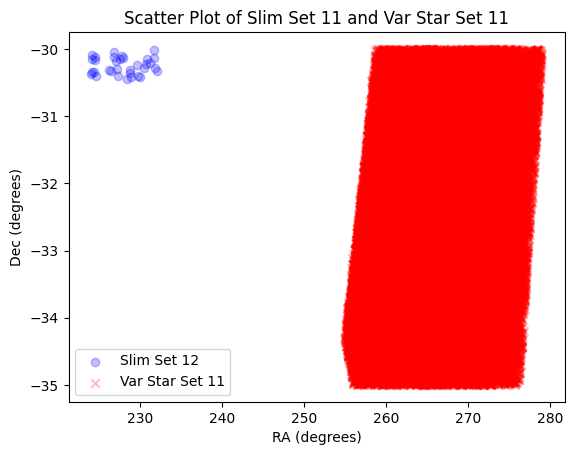

In [28]:
# generally unnecessary so this cell did not receive an update for ease of use like the separation code

# could run this cell before comparing. allows visualization of data points, albeit on a 2d space
# if so, uncomment the line below and put the number that corresponds to the pair of datasets to compare
# set_num = whatever

# scatter plot for the 'slim_set{set_num}' dataframe
slim_coords = slim_sets[f'slim_set{set_num}']['Coordinate']
slim_ra = slim_coords.apply(lambda coord: coord.ra.deg)
slim_dec = slim_coords.apply(lambda coord: coord.dec.deg)
plt.scatter(slim_ra, slim_dec, label=f'Slim Set {set_num}', marker='o', color='blue', alpha=0.25)

# scatter plot for the 'var_star_set{set_num}' dataframe
var_coords = var_star_sets[f'var_star_set{set_num}']['Coordinate']
var_ra = var_coords.apply(lambda coord: coord.ra.deg)
var_dec = var_coords.apply(lambda coord: coord.dec.deg)
plt.scatter(var_ra, var_dec, label=f'Var Star Set {set_num}', marker='x', color='red', alpha=0.25)

# labels and title
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title(f'Scatter Plot of Slim Set {set_num} and Var Star Set {set_num}')

# legend
plt.legend()

# plot
plt.show()
